In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("BostonHousing.csv")
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

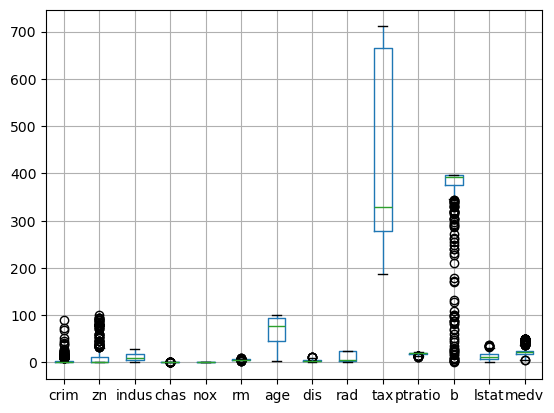

In [4]:
df.boxplot()

In [10]:
 q1=df["medv"].quantile(0.25)
 q3=df["medv"].quantile(0.75)
 IQR=q3-q1
 lower=q1-1.5*IQR
 upper=q3+1.5*IQR
 print(f'Q1={q1}\nQ3={q3}\nIQR={IQR}\nlower={lower}\nupper={upper}')

Q1=17.025
Q3=25.0
IQR=7.975000000000001
lower=5.0624999999999964
upper=36.962500000000006


In [12]:
outliers_medv=[]
for i in df.medv:
    if i<lower or i>upper:
        outliers_medv.append(i)
print("Outliers are ",outliers_medv) 

Outliers are  [38.7, 43.8, 41.3, 50.0, 50.0, 50.0, 50.0, 37.2, 39.8, 37.9, 50.0, 37.0, 50.0, 42.3, 48.5, 50.0, 44.8, 50.0, 37.6, 46.7, 41.7, 48.3, 42.8, 44.0, 50.0, 43.1, 48.8, 50.0, 43.5, 45.4, 46.0, 50.0, 37.3, 50.0, 50.0, 50.0, 50.0, 50.0, 5.0, 5.0]


In [13]:
df[df.medv<lower].index

Index([398, 405], dtype='int64')

In [14]:
df1 = df.drop(df[df.medv < lower].index.intersection(df[df.medv > upper].index))

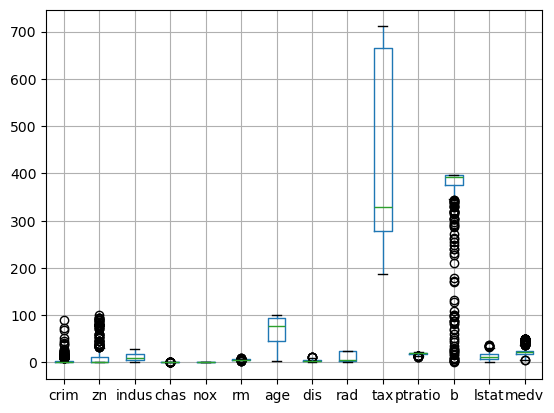

In [15]:
df1.boxplot()
plt.show()

In [16]:
print(df1.shape)

(506, 14)


In [18]:
outliers_medv=[]
for i in df1.medv:
    if i<lower or i>upper:
        outliers_medv.append(i)
print("outliers are",outliers_medv)

outliers are [38.7, 43.8, 41.3, 50.0, 50.0, 50.0, 50.0, 37.2, 39.8, 37.9, 50.0, 37.0, 50.0, 42.3, 48.5, 50.0, 44.8, 50.0, 37.6, 46.7, 41.7, 48.3, 42.8, 44.0, 50.0, 43.1, 48.8, 50.0, 43.5, 45.4, 46.0, 50.0, 37.3, 50.0, 50.0, 50.0, 50.0, 50.0, 5.0, 5.0]


In [19]:
df1

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [20]:
import pandas as pd
import numpy as np
Q1 = df['medv'].quantile(0.25)
Q3 = df['medv'].quantile(0.75)
IQR = Q3- Q1
lower = Q1- 1.5 * IQR
upper = Q3 + 1.5 * IQR
df1 = df[(df['medv'] >= lower) & (df['medv'] <= upper)]
import matplotlib.pyplot as plt

In [21]:
x=df.drop(['medv'],axis=1)
y=df['medv']

In [22]:
x

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [23]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64

In [24]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)

In [25]:
import sklearn
from sklearn.linear_model import LinearRegression
lm=LinearRegression()

In [30]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean') # You can choose other strategies like 'median' or 'most_frequent'
x= imputer.fit_transform(x)

# 2. Split the data after imputation
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=0)

# 3. Create and train the model
lm = LinearRegression()
model = lm.fit(xtrain, ytrain)

In [31]:
model

LinearRegression()

In [32]:
ytrain_pred = lm.predict(xtrain)
ytest_pred = lm.predict(xtest)
ytrain_pred

array([32.54370319, 21.932219  , 27.54552964, 23.62527133,  6.578493  ,
       14.97841931, 22.21772491, 29.1656419 , 33.23633623, 13.13958076,
       20.27455237, 20.68413823, 12.66852204, 23.3697738 ,  5.02810654,
       19.82447761,  9.43610482, 44.62829537, 30.78647869, 12.51813161,
       17.73377577, 21.38820917, 23.6372432 , 20.44934681, 34.99179512,
       13.88126045, 21.08693233, 35.14506971, 19.42370996, 13.14651005,
       14.07551034, 23.11554812, 14.35905012, 31.26696558, 25.30600475,
       15.4186878 , 24.22888048,  9.38631784, 14.92650845, 20.8121123 ,
       32.71894972, 27.98210777, 25.59531311, 15.57980306, 31.11707339,
       27.96643339, 13.98777371,  7.63296162, 28.439442  , 25.35431753,
        4.50921003, 28.38300415, 16.98778052, 29.76898387, 20.46579326,
       15.92063503, 17.90107052, 12.73790055,  8.74450855, 19.2209131 ,
       34.49718351, 32.92991179, 23.69727449, 19.56029786, 22.84821335,
       26.87821751, 21.82625519, 17.07317532, 32.05572536, 10.93

In [33]:
ytrain

220    26.7
71     21.7
240    22.0
6      22.9
417    10.4
       ... 
323    18.5
192    36.4
117    19.2
47     16.6
172    23.1
Name: medv, Length: 404, dtype: float64

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score ,mean_absolute_error # Import necessary metrics

mae_train = mean_absolute_error(ytrain, ytrain_pred)
mae_test = mean_absolute_error(ytest, ytest_pred)

print(f"Mean Absolute Error (Train): {mae_train}")
print(f"Mean Absolute Error (Test): {mae_test}")

mse = mean_squared_error(ytrain, ytrain_pred)
print("The model performance for training set")
print("--------------------------------------")
print('MSE is {}'.format(mse))
print("\n")
# model evaluation for testing set
#y_test_predict = lin_model.predict(X_test)

mse = mean_squared_error(ytest, ytest_pred)
print("The model performance for testing set")
print("--------------------------------------")
print('MSE is {}'.format(mse))
print("\n\n\n")

rmse = (np.sqrt(mean_squared_error(ytrain, ytrain_pred)))
print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))

print("The model performance for testing set")
rmse = (np.sqrt(mean_squared_error(ytest, ytest_pred)))
print('RMSE is {}'.format(rmse))